<a href="https://colab.research.google.com/github/electrojam/Curso-de-Decision-Trees-y-Random-Forest-con-Python-y-scikit-learn/blob/main/Adult_Tree_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenamiento con Árbol de decisión

In [1]:
# Importamos las librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

utilizaremos el Adult dataset de https://archive.ics.uci.edu/dataset/2/adult

In [38]:
# Cargamos dataset a utilizar
df_adult = pd.read_csv('adult.csv', header=None)
df_adult

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Análisis exploratorio de datos

In [39]:
# Visualización del dataframe
df_adult.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [40]:
# analizamos el shape del objeto
print(df_adult.shape)

(32561, 15)


In [41]:
# Renombramos las columnas de manera correcta
col_names = ['age',
             'workclass',
             'fnlwgt',
             'education',
             'education-num',
             'marital-status',
             'occupation',
             'relationship',
             'race',
             'sex',
             'capital-gain',
             'capital-loss',
             'hours-per-week',
             'native-country',
             'income']
df_adult.columns = col_names

In [42]:
# Verificamos la transformación
df_adult.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [43]:
# Verificamos los tipos de datos
df_adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [44]:
# Verificamos la varibale target
df_adult['income'].value_counts()

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [48]:
# Verificamos valore missings = null
df_adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [50]:
# Convertimos variable target income a entero numérica
df_adult['income'].replace(to_replace=' <=50K', value=1, inplace=True)
df_adult['income'].replace(to_replace=' >50K', value=0, inplace=True)

In [51]:
# Verificamos variable target income
df_adult['income']

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    0
32558    1
32559    1
32560    0
Name: income, Length: 32561, dtype: int64

## Procesamiento de datos


In [53]:
# Separamos X e y
X = df_adult.drop(['fnlwgt', 'income'], axis=1)
y = df_adult['income']

In [54]:
# Importamos las librerías necesarias para la creación del modelo Tree decision
from sklearn.model_selection import train_test_split

# 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [55]:
# Veamos que obtuvimos
X_train.shape, X_test.shape

((22792, 13), (9769, 13))

In [56]:
y_train.shape, y_test.shape

((22792,), (9769,))

In [57]:
X_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
19749,34,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,2179,12,United-States
1216,48,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7688,0,40,United-States
27962,23,State-gov,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States
23077,56,Local-gov,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
10180,17,Private,11th,7,Never-married,Priv-house-serv,Own-child,White,Female,0,0,9,United-States


In [58]:
X_train.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

## Entrenamiento de modelo de clasificación con árbol de decisión

In [18]:
# Instalamos librería category-encoders en google colab
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [59]:
# las variables workclass, education, marital-status, occupation, realtionship, race, sex, native-country
# ...son de tipo object
# Convertimos variables categóricas a variables numéricas, en X_train

import category_encoders as ce

# Definimos variable encoder
encoder = ce.OrdinalEncoder(cols=['age',
             'workclass',
             'education',
             'education-num',
             'marital-status',
             'occupation',
             'relationship',
             'race',
             'sex',
             'capital-gain',
             'capital-loss',
             'hours-per-week',
             'native-country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [61]:
# Verificamos la transformación
X_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
19749,1,1,1,1,1,1,1,1,1,1,1,1,1
1216,2,1,2,2,1,2,2,2,2,2,2,2,1
27962,3,2,2,2,1,3,2,1,2,1,2,3,1
23077,4,3,1,1,2,4,3,1,1,1,2,2,1
10180,5,4,3,3,3,5,4,1,1,1,2,4,1


In [62]:
X_test.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
14160,14,4,2,2,2,9,3,1,1,1.0,2.0,16.0,1
27048,11,2,1,1,1,4,1,1,1,1.0,2.0,2.0,1
28868,39,4,5,5,1,4,2,3,2,1.0,2.0,8.0,1
5667,24,4,5,5,3,10,3,1,1,1.0,2.0,2.0,1
7827,39,1,2,2,2,2,3,1,2,9.0,2.0,15.0,1


In [63]:
# Importamos librería árbol de decisión
from sklearn.tree import DecisionTreeClassifier

# Creación del modelo
# Definimos objeto que tendrá el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [64]:
# Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [66]:
# Cálculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [67]:
y_train_pred_tree

array([1, 1, 1, ..., 1, 1, 1])

In [68]:
print(y_train_pred_tree.shape)
print(y_test_pred_tree.shape)

(22792,)
(9769,)


## Evaluación del modelo de clasificación con árbol de decisión.

In [69]:
# Cálculo de métricas
# Imporamos librerías
from sklearn.metrics import accuracy_score

# Calculamos el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

# Calculamos el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El accuracy en Train es:', train_accuracy_tree)
print('El accuracy en Test es:', test_accuracy_tree)

El accuracy en Train es: 0.7911547911547911
El accuracy en Test es: 0.7876957723410789


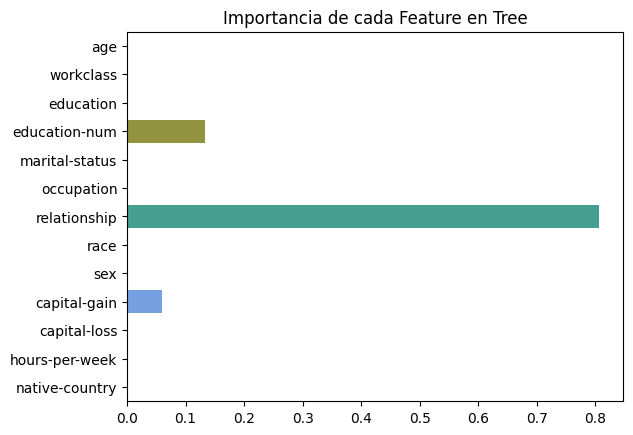

In [75]:
# Verificamos el feature importances, mediante gráfica
# Importamos librería
import seaborn as sns

importances = tree.feature_importances_
columns = ['age',
          'workclass',
          'education',
          'education-num',
          'marital-status',
          'occupation',
          'relationship',
          'race',
          'sex',
          'capital-gain',
          'capital-loss',
          'hours-per-week',
          'native-country']
data = pd.DataFrame([importances], columns=columns)
sns.barplot(x=importances, y=columns, hue=columns, linewidth=2)
plt.title('Importancia de cada Feature en Tree')
plt.show()

# Entrenamiento con modelo de Clasificación con Random Forest

In [76]:
# Impotamos librería Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [77]:
# Cálculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

## Evaluación del modelo de clasificación con Random Forest

In [79]:
# Cálculo de métricas
from sklearn.metrics import accuracy_score

# Cálculo del accuracy en Train
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('El accuracy en Train es:', train_accuracy_rf)
print('El accuracy en Test es:', test_accuracy_rf)

El accuracy en Train es: 0.9725780975780975
El accuracy en Test es: 0.8294605384379159


In [80]:
# Visualización de los Features importantes
features_scores = pd.Series(rf.feature_importances_, index = columns).sort_values(ascending=False)
features_scores

age               0.217760
relationship      0.142720
occupation        0.116493
hours-per-week    0.100084
marital-status    0.083951
capital-gain      0.081262
education-num     0.061308
education         0.055153
workclass         0.055127
capital-loss      0.032784
native-country    0.022633
race              0.018779
sex               0.011947
dtype: float64

Text(0.5, 1.0, 'Visualizando los Features Importances de Random Forest')

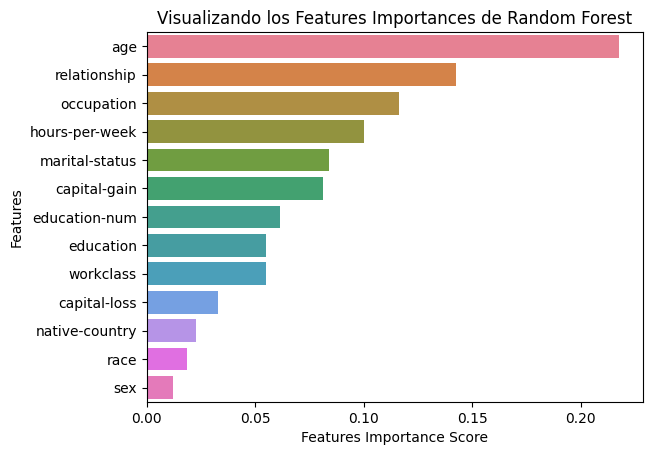

In [83]:
# Gáfico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_scores, y=features_scores.index, hue=features_scores.index)
plt.xlabel('Features Importance Score')
plt.ylabel('Features')
plt.title('Visualizando los Features Importances de Random Forest')

In [84]:
# Matriz de confusión del Random Forest
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)

print('Matriz de confusión\n\n', cm)

Matriz de confusión

 [[1439  875]
 [ 791 6664]]


In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.65      0.62      0.63      2314
           1       0.88      0.89      0.89      7455

    accuracy                           0.83      9769
   macro avg       0.76      0.76      0.76      9769
weighted avg       0.83      0.83      0.83      9769

